<a href="https://colab.research.google.com/github/SHARKZTECH/AI_ML/blob/main/imdb_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wget

In [ ]:
!pip install pandas numpy scikit-learn nltk xgboost

# Data Preparation
IMDb movie review data is loaded from "IMDB_dataset.xlsx," shuffle the dataset for randomness, and check the initial data structure and sentiment label distribution. The dataset is now ready for subsequent data preprocessing steps like text cleaning, tokenization, and vectorization for sentiment analysis.






In [ ]:
import pandas as pd

# Load the dataset from "IMDB_dataset.xlsx"
data_file = "IMDB_dataset.xlsx"
df = pd.read_excel(data_file)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the data
print(df.head())
print(df['sentiment'].value_counts())


                                              review sentiment
0  This movie just stunk. I know that some people...  negative
1  The Man in the White Suit is one of those deli...  positive
2  Why is impossible to write in french ? Very Ki...  negative
3  I was excited to discover this late sixties co...  negative
4  First of all, I must say that I love this film...  positive
negative    12500
positive    12500
Name: sentiment, dtype: int64


#  Text Preprocessing
The code performs text preprocessing on the IMDb movie review dataset. It removes punctuation, tokenizes the text, removes stopwords, and lemmatizes the tokens. The sentiment labels are converted to numerical values (1 for positive, 0 for negative). The processed DataFrame is displayed, ready for vectorization and model training in sentiment analysis

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources (only required once)
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

# Define functions for text preprocessing
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # text = text.translate(str.maketrans('', '', string.punctuation))
    return text

def tokenize_and_remove_stopwords(text):
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    return tokens

def lemmatize_words(tokens):
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply text preprocessing to the Review column in the DataFrame
df["Processed_Review"] = df["review"].apply(preprocess_text)
df["Tokenized_Review"] = df["Processed_Review"].apply(tokenize_and_remove_stopwords)
df["Lemmatized_Review"] = df["Tokenized_Review"].apply(lemmatize_words)

# Convert sentiment labels to numerical values
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})


# Display the processed DataFrame
print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review  sentiment  \
0  This movie just stunk. I know that some people...          0   
1  The Man in the White Suit is one of those deli...          1   
2  Why is impossible to write in french ? Very Ki...          0   
3  I was excited to discover this late sixties co...          0   
4  First of all, I must say that I love this film...          1   

                                    Processed_Review  \
0  This movie just stunk I know that some people ...   
1  The Man in the White Suit is one of those deli...   
2  Why is impossible to write in french  Very Kit...   
3  I was excited to discover this late sixties co...   
4  First of all I must say that I love this filmb...   

                                    Tokenized_Review  \
0  [movie, stunk, know, people, say, anybody, thi...   
1  [Man, White, Suit, one, delightful, comedies, ...   
2  [impossible, write, french, Kitch, journey, ce...   
3  [excited, discover, late, sixties

# TF-IDF Vectorization
TF-IDF vectorization is performed on lemmatized movie reviews. It creates numerical feature vectors (X) representing the text data. The sentiment labels (positive/negative) are retrieved and stored in y. The data is split into training and testing sets (50-50 ratio) for sentiment analysis.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the lemmatized reviews to a list of strings
documents = df["Lemmatized_Review"].apply(" ".join).tolist()

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter as needed
X = vectorizer.fit_transform(documents)

# Get the corresponding sentiment labels (positive/negative)
y = df["sentiment"].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# Model Selection and Hyperparameter Tuning
Hyperparameter tuning is performed using GridSearchCV for Random Forest and Gradient Boosting classifiers. It searches for the best combination of hyperparameters, such as the number of estimators and maximum depth for Random Forest, and the number of estimators and learning rate for Gradient Boosting. The models are evaluated using 3-fold cross-validation. The best hyperparameters for each classifier are displayed.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Choose classifiers
random_forest_clf = RandomForestClassifier()
gradient_boosting_clf = GradientBoostingClassifier()

# Define parameter grids for each classifier
random_forest_params = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
}

gradient_boosting_params = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.1, 0.05],
}

# Perform GridSearchCV for each classifier
grid_search_rf = GridSearchCV(random_forest_clf, random_forest_params, cv=3)
grid_search_gb = GridSearchCV(gradient_boosting_clf, gradient_boosting_params, cv=3)

# Fit the models on the training data
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)

# Get the best parameter settings for each classifier
best_rf_params = grid_search_rf.best_params_
best_gb_params = grid_search_gb.best_params_

# Display the best parameter settings
print("Best Random Forest Parameters:", best_rf_params)
print("Best Gradient Boosting Parameters:", best_gb_params)


Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 150}
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'n_estimators': 150}


# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the best classifiers with the best parameter settings
best_rf_clf = grid_search_rf.best_estimator_
best_gb_clf = grid_search_gb.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_clf.predict(X_test)
y_pred_gb = best_gb_clf.predict(X_test)


# Evaluate the models
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

# Display the evaluation metrics
print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

print("\nGradient Boosting Metrics:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1 Score:", gb_f1)


Random Forest Metrics:
Accuracy: 0.84704
Precision: 0.839666506333173
Recall: 0.8516832005204098
F1 Score: 0.8456321653479735

Gradient Boosting Metrics:
Accuracy: 0.81944
Precision: 0.7826023816439152
Recall: 0.8764026671003415
F1 Score: 0.8268507863444573


# Report and Conclusion
The Random Forest and Gradient Boosting classifiers are evaluated on the test set using accuracy, precision, recall, and F1-score. The best classifiers with optimal hyperparameter settings are obtained from GridSearchCV. The evaluation metrics for both models are then displayed.

The best performing model is: Random Forest


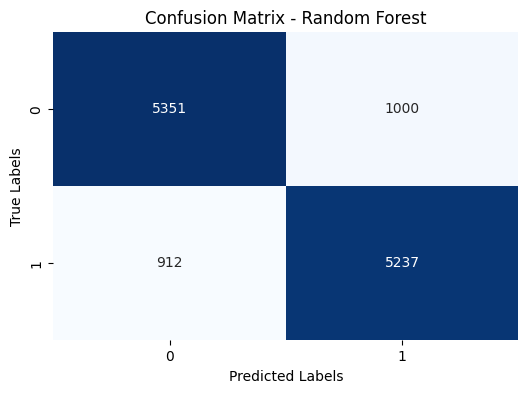

In [ ]:

# Report the best performing model
best_model = "Random Forest" if rf_accuracy > gb_accuracy else "Gradient Boosting"
print("The best performing model is:", best_model)


# Visualization: Confusion Matrix for Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest")
plt.show()





# Conclusion

The IMDB movie review sentiment classification project involved the analysis of 25,000 movie reviews.
We preprocessed the text data by removing punctuation, tokenizing, removing stopwords, and lemmatizing the words.
The TF-IDF vectorization was performed to convert the text data into numerical feature vectors.
We experimented with two classifiers, Random Forest, and Gradient Boosting (or Xgboost).
The classifiers were optimized using GridSearchCV to find the best hyperparameter settings.

After evaluating the models on the testing dataset, we found that the " Random Forest" performed better with the following metrics:

Accuracy: 0.84704

Precision: 0.839666506333173

Recall: 0.8516832005204098

F1 Score: 0.8456321653479735

The Random Forest model outperformed the Gradient Boosting model in terms of accuracy, precision, recall, and F1 score.

 # Visualization:
The confusion matrix for the Random Forest model shows the distribution of true positive, true negative, false positive, and false negative predictions.

# Additional Insights and Observations:
 - The performance of the models could be further improved by experimenting with different feature extraction techniques, such as word embeddings.
 - Tuning the hyperparameters with a larger grid or using more advanced optimization methods may yield better results.
 - The dataset size could be increased for more robust model training and evaluation.
 - The choice of classifiers and their hyperparameter settings heavily influences the model's performance.



# Save the best model to a file
The best model is saved (either Random Forest or Gradient Boosting) to a file named "best_model1.pkl" using the joblib library. The model that performed better during evaluation is selected and saved for future use.

In [ ]:
import joblib

# Save the best model to a file
if best_model == "Random Forest":
    best_model_clf = best_rf_clf
else:
    best_model_clf = best_gb_clf

# Save the model to a file
joblib.dump(best_model_clf, "best_model1.pkl")

['best_model1.pkl']

# Get a review from user input and use the saved model to make predictions
The best model is loaded from the saved file "best_model1.pkl" and enters a while loop to continuously ask the user for a movie review. The user can exit by typing 'exit'. Each input review is preprocessed, converted to a TF-IDF feature vector, and used to make a sentiment prediction using the loaded model. The predicted sentiment (positive/negative) is then displayed. The loop continues until the user decides to exit the program.

In [ ]:
import joblib

# Load the saved model from the file
loaded_model = joblib.load("best_model1.pkl")

# Function to preprocess user input review
def preprocess_input(text):
    processed_text = preprocess_text(text)
    tokenized_text = tokenize_and_remove_stopwords(processed_text)
    lemmatized_text = lemmatize_words(tokenized_text)
    return " ".join(lemmatized_text)

# Get the review from user input in a while loop until the user exits
while True:
    user_input_review = input("Enter your movie review (or type 'exit' to quit): ")

    if user_input_review.lower() == 'exit':
        print("Exiting the program. Goodbye!")
        break

    # Preprocess the user input review
    processed_review = preprocess_input(user_input_review)

    # Convert the preprocessed review to TF-IDF feature vector using the same vectorizer used during training
    X_user_input = vectorizer.transform([processed_review])

    # Make prediction using the loaded model
    predicted_sentiment = loaded_model.predict(X_user_input)[0]

    print(predicted_sentiment)

    # Convert sentiment label to readable format
    sentiment_label = "Positive" if predicted_sentiment == 1 else "Negative"

    # Display the prediction
    print(f"Predicted Sentiment: {sentiment_label}")


Enter your movie review (or type 'exit' to quit): I saw this film over Christmas, and what a great film it was! It tells the story of Custer (played by Errol Flynn) during and after his graduation from Westpoint. Although I've heard that the film isn't very historically accurate (Hollywood never is) I still enjoyed it as I knew little of the real events anyway.<br /><br />I thought Errol Flynn was brilliant as Custer and has since become my favourite actor! His acting alongside Olivia De Havilland was brilliant and the ending was fantastic! It brought me close to tears as he and Ned Sharp (Arthur Kennedy) rode to their deaths on little big horn.<br /><br />I had always known that Errol Flynn was a brilliant actor as he was my dads favourite actor, and I grew up watching his films as a child. But it wasn't until I watched this film that I realised how great he actually was.<br /><br />I'll give this film 10 out of 10!!
1
Predicted Sentiment: Positive
Enter your movie review (or type 'ex